# https://www.datacamp.com/community/tutorials/amazon-web-scraping-using-beautifulsoup

In [1]:
# import libraries

import re
from bs4 import BeautifulSoup
import requests
import time
from datetime import datetime
from urllib.request import urlopen

## Retrieving Data from Amazon Store Using Webscaping Route

In [2]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}

product_list = []

def getData(url, pageNo):

    url = eval("f'" + url +"'")

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    products = soup.find_all('div', {'id':'gridItemRoot'})

    # time.sleep(1)

    for product in products:
        items = {
        'category' : soup.find('h1', attrs={'class':'a-size-large a-spacing-medium a-text-bold'}).text,   
        'orders' : product.find('span', attrs={'class':'zg-bdg-text'}).text,
        'name' : [x.get_text() for x in product.find_all('div', attrs={'class':'_p13n-zg-list-grid-desktop_truncationStyles_p13n-sc-css-line-clamp-3__g3dy1'})] if len([x.get_text() for x in product.find_all('div', attrs={'class':'_p13n-zg-list-grid-desktop_truncationStyles_p13n-sc-css-line-clamp-3__g3dy1'})]) > 0 else [x.get_text() for x in product.find_all('div', attrs={'class':'_p13n-zg-list-grid-desktop_truncationStyles_p13n-sc-css-line-clamp-1__1Fn1y'})],
        'prices' : [x.get_text() for x in product.find_all('span', attrs={'class':"_p13n-zg-list-grid-desktop_price_p13n-sc-price__3mJ9Z"})],
        'ratings' : [x.get_text() for x in product.find_all('span', attrs={'class':'a-icon-alt'})],
        'rating_count' : [x.get_text() for x in product.find_all('span', attrs={'class':'a-size-small'})],
        }
        product_list.append(items)

    return

In [3]:
def getLinks(url):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    links = soup.find_all('div', {'role': 'treeitem', 'class': '_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf _p13n-zg-nav-tree-all_style_zg-browse-height-large__1z5B8'})

    mylink = []
    for link in links:
        a = link.findAll('a')
        for x in a:
            href_link = x.get('href')
            newlink = 'https://www.amazon.com'+href_link
            mylink.append(newlink)

    return(mylink)    

In [4]:
# get url for every Page on Amazon

def getURL():

    URL = 'https://www.amazon.com/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0'

    response = requests.get(URL, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    links = soup.find_all('div', {'role': 'treeitem', 'class': '_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf _p13n-zg-nav-tree-all_style_zg-browse-height-large__1z5B8'})

    mylinks = []
    mylinks.append('https://www.amazon.com/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_pg_{pageNo}?_encoding=UTF8&pg={pageNo}')

    for link in links:
        a = link.findAll('a')
        for x in a:
            href_link = x.get('href')
            newlink = 'https://www.amazon.com/'+href_link
            newlink2 = 'https://www.amazon.com/'+href_link

            newlink = str(newlink).replace('_nav_electronics_1', "_pg_{pageNo}?_encoding=UTF8&pg={pageNo}")
            mylinks.append(newlink)

            newlink3 = getLinks(newlink2) # list of sub-links
            for link2 in newlink3:
                newlink_prime = str(link2).replace('_nav_electronics_2', "_pg_{pageNo}?_encoding=UTF8&pg={pageNo}")
                mylinks.append(newlink_prime)

    return(mylinks)

In [5]:
allLinks = getURL()

In [6]:
pageNo = 2
for URL in allLinks:
    for x in range (0,pageNo+1):
        getData(URL, x)

print(product_list)

[{'category': 'Best Sellers in Electronics', 'orders': '#1', 'name': ['Fire TV Stick Lite with Alexa Voice Remote Lite (no TV controls), HD streaming device'], 'prices': ['$29.99'], 'ratings': ['4.7 out of 5 stars'], 'rating_count': ['221,078']}, {'category': 'Best Sellers in Electronics', 'orders': '#2', 'name': ['Fire TV Stick 4K streaming device with latest Alexa Voice Remote (includes TV controls), Dolby Vision'], 'prices': ['$39.99'], 'ratings': ['4.8 out of 5 stars'], 'rating_count': ['61,896']}, {'category': 'Best Sellers in Electronics', 'orders': '#3', 'name': ['Fire TV Stick with Alexa Voice Remote (includes TV controls), HD streaming device'], 'prices': ['$39.99'], 'ratings': ['4.7 out of 5 stars'], 'rating_count': ['168,919']}, {'category': 'Best Sellers in Electronics', 'orders': '#4', 'name': ['Echo Dot (4th Gen, 2020 release) | Smart speaker with Alexa | Charcoal'], 'prices': ['$49.99'], 'ratings': ['4.7 out of 5 stars'], 'rating_count': ['413,401']}, {'category': 'Best 

In [2]:
import pandas as pd

amazon_best_sellers = pd.DataFrame(product_list, columns=['category', 'orders', 'name', 'prices', 'ratings', 'rating_count'])

amazon_best_sellers.head()

NameError: name 'product_list' is not defined

## Data Cleaning

In [2]:
# will need to comment out in final version

import pandas as pd
import numpy as np
df = pd.read_csv('amazon_best_sellers.csv')

In [4]:
df.head()

category orders  \
0  Best Sellers in Electronics     #1   
1  Best Sellers in Electronics     #2   
2  Best Sellers in Electronics     #3   
3  Best Sellers in Electronics     #4   
4  Best Sellers in Electronics     #5   

                                                name      prices  \
0  ['Fire TV Stick Lite with Alexa Voice Remote L...  ['$29.99']   
1  ['Fire TV Stick 4K streaming device with lates...  ['$39.99']   
2  ['Fire TV Stick with Alexa Voice Remote (inclu...  ['$39.99']   
3  ['Echo Dot (4th Gen, 2020 release) | Smart spe...  ['$49.99']   
4                                   ['Apple AirTag']  ['$29.00']   

                  ratings rating_count  
0  ['4.7 out of 5 stars']  ['221,078']  
1  ['4.8 out of 5 stars']   ['61,896']  
2  ['4.7 out of 5 stars']  ['168,919']  
3  ['4.7 out of 5 stars']  ['413,401']  
4  ['4.7 out of 5 stars']   ['42,541']

In [4]:
df.dtypes

category        object
orders          object
name            object
prices          object
ratings         object
rating_count    object
dtype: object

In [3]:
# Deleting brackets

df['prices'] = df['prices'].str.replace("[", "").str.replace("]", "")
df['name'] = df['name'].str.replace("[", "").str.replace("]", "")
df['ratings'] = df['ratings'].str.replace("[", "").str.replace("]", "")
df['rating_count'] = df['rating_count'].str.replace("[", "").str.replace("]", "")

df.head()

C:\Users\Josh\AppData\Local\Temp/ipykernel_16940/1661755754.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['prices'] = df['prices'].str.replace("[", "").str.replace("]", "")
C:\Users\Josh\AppData\Local\Temp/ipykernel_16940/1661755754.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['name'] = df['name'].str.replace("[", "").str.replace("]", "")
C:\Users\Josh\AppData\Local\Temp/ipykernel_16940/1661755754.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['ratings'] = df['ratings'].str.replace("[", "").str

category orders  \
0  Best Sellers in Electronics     #1   
1  Best Sellers in Electronics     #2   
2  Best Sellers in Electronics     #3   
3  Best Sellers in Electronics     #4   
4  Best Sellers in Electronics     #5   

                                                name    prices  \
0  'Fire TV Stick Lite with Alexa Voice Remote Li...  '$29.99'   
1  'Fire TV Stick 4K streaming device with latest...  '$39.99'   
2  'Fire TV Stick with Alexa Voice Remote (includ...  '$39.99'   
3  'Echo Dot (4th Gen, 2020 release) | Smart spea...  '$49.99'   
4                                     'Apple AirTag'  '$29.00'   

                ratings rating_count  
0  '4.7 out of 5 stars'    '221,078'  
1  '4.8 out of 5 stars'     '61,896'  
2  '4.7 out of 5 stars'    '168,919'  
3  '4.7 out of 5 stars'    '413,401'  
4  '4.7 out of 5 stars'     '42,541'

In [4]:
# getting rid of quotation marks, commas and converting object columns to correct variable type

# orders column
df['orders'] = df['orders'].str.replace("#", "")
df['orders'] = pd.to_numeric(df['orders'], errors='coerce').fillna(0,downcast='infer')

# name column
df['name'] = df['name'].str.replace("'", "")

# Prices column
df['prices'] = df['prices'].str.replace("'", "").str.replace("$", "")
df['prices'] = pd.to_numeric(df['prices'], errors='coerce').fillna(0,downcast='infer')

# rating_count column
df['rating_count'] = df['rating_count'].str.replace("'", "").str.replace(",", "")
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0,downcast='infer')

# ratings column
df['ratings'] = df['ratings'].str.replace("'", "")
df['ratings'] = pd.to_numeric(df['ratings'].str.split(' out of 5 stars').str[0])

df.head()

C:\Users\Josh\AppData\Local\Temp/ipykernel_16940/3203373556.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['prices'] = df['prices'].str.replace("'", "").str.replace("$", "")


category  orders  \
0  Best Sellers in Electronics       1   
1  Best Sellers in Electronics       2   
2  Best Sellers in Electronics       3   
3  Best Sellers in Electronics       4   
4  Best Sellers in Electronics       5   

                                                name  prices  ratings  \
0  Fire TV Stick Lite with Alexa Voice Remote Lit...   29.99      4.7   
1  Fire TV Stick 4K streaming device with latest ...   39.99      4.8   
2  Fire TV Stick with Alexa Voice Remote (include...   39.99      4.7   
3  Echo Dot (4th Gen, 2020 release) | Smart speak...   49.99      4.7   
4                                       Apple AirTag   29.00      4.7   

   rating_count  
0        221078  
1         61896  
2        168919  
3        413401  
4         42541

In [7]:
df.dtypes

category         object
orders            int64
name             object
prices          float64
ratings         float64
rating_count      int64
dtype: object

In [8]:
# amazon_best_sellers.to_csv('amazon_best_sellers.csv', index=None, header=True)

In [5]:
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [7]:
len(df)-df.count()

category        0
orders          0
name            0
prices          0
ratings         0
rating_count    0
dtype: int64

In [6]:
df = df.dropna()

## EDA

In [7]:
# Import Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [8]:
df.describe()

orders        prices       ratings   rating_count
count  12697.000000  12697.000000  12697.000000   12697.000000
mean      16.857683     76.962561      4.453446   15074.706939
std       12.368590    113.168886      0.328111   41033.447771
min        1.000000      0.990000      1.000000       1.000000
25%        8.000000     15.990000      4.300000     441.000000
50%       16.000000     31.960000      4.500000    2541.000000
75%       24.000000     89.990000      4.700000   10540.000000
max       80.000000    999.990000      5.000000  875687.000000

<AxesSubplot:>

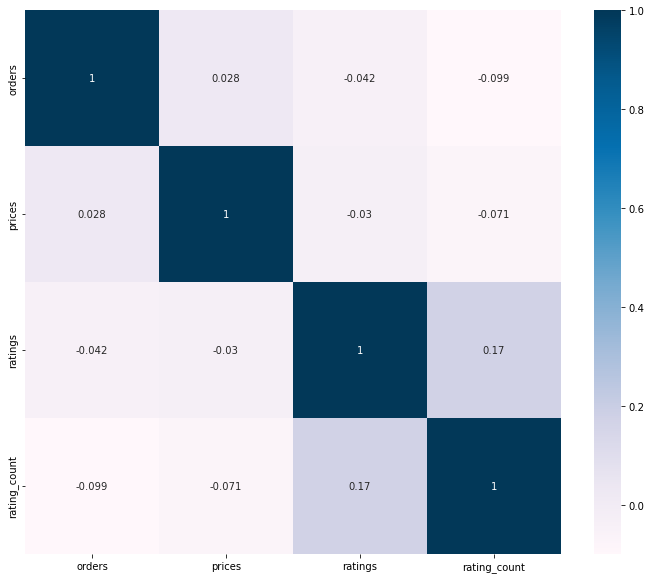

In [9]:
# Correlation map

plt.figure(figsize=(12,10))
corr_plot = sns.heatmap(df.corr(), annot= True, cmap='PuBu')
corr_plot

In [27]:
cat_count = df['category'].value_counts()
cat_name = df['category'].value_counts().index


temp_df = {'categories': cat_name, 'category_count': cat_count}
df2 = pd.DataFrame(data=temp_df)
df2

categories  \
Best Sellers in GPS System Accessories                    Best Sellers in GPS System Accessories   
Best Sellers in Home Audio Accessories                    Best Sellers in Home Audio Accessories   
Best Sellers in Power Strips & Surge Protectors  Best Sellers in Power Strips & Surge Protectors   
Best Sellers in TV Accessories                                    Best Sellers in TV Accessories   
Best Sellers in Cable Organizer Bags & Cases        Best Sellers in Cable Organizer Bags & Cases   
...                                                                                          ...   
Best Sellers in Wearable Technology                          Best Sellers in Wearable Technology   
Best Sellers in VCRs                                                        Best Sellers in VCRs   
Best Sellers in Smartwatch Accessories                    Best Sellers in Smartwatch Accessories   
Best Sellers in Portable Minidisc Players              Best Sellers in Portable Minidisc Players   
Best Sellers in Cell Phone Cases & Covers              Best Sellers in Cell Phone Cases & Covers   

                                                 category_count  
Best Sellers in GPS System Accessories                      180  
Best Sellers in Home Audio Accessories                      180  
Best Sellers in Power Strips & Surge Protectors             180  
Best Sellers in TV Accessories                              177  
Best Sellers in Cable Organizer Bags & Cases                174  
...                                                         ...  
Best Sellers in Wearable Technology                          11  
Best Sellers in VCRs                                          9  
Best Sellers in Smartwatch Accessories                        6  
Best Sellers in Portable Minidisc Players                     6  
Best Sellers in Cell Phone Cases & Covers                     2  

[174 rows x 2 columns]

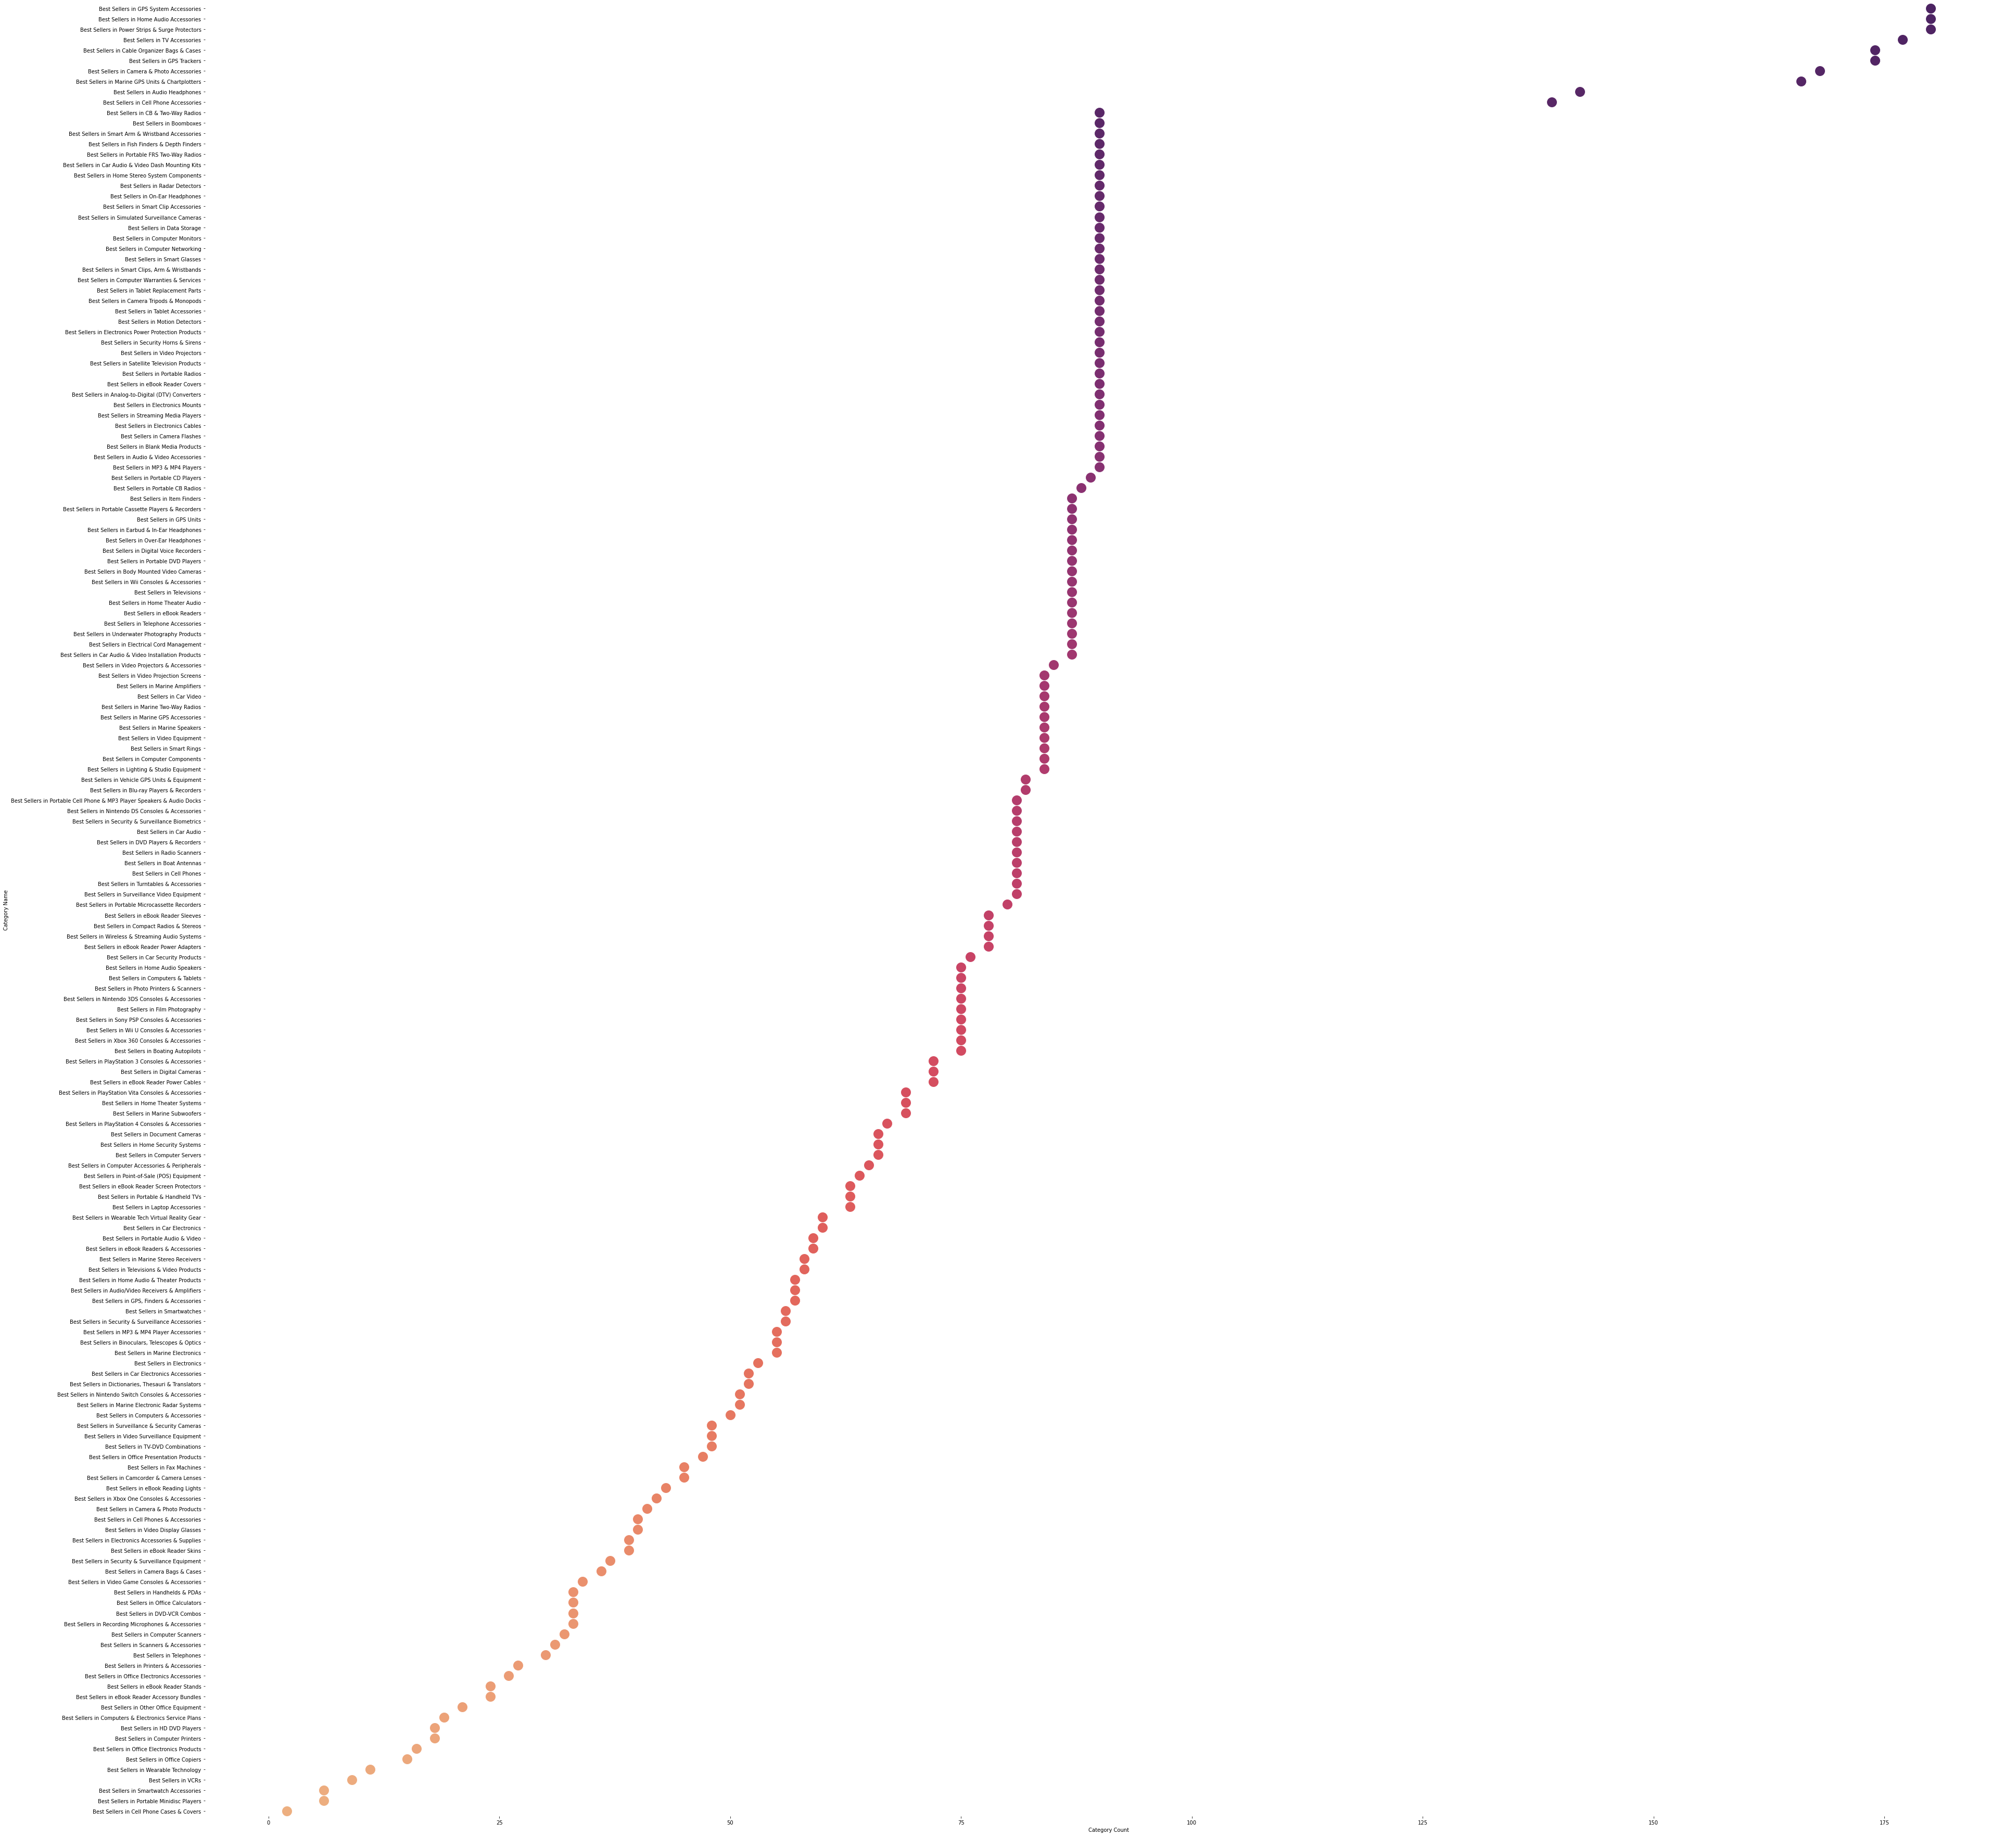

In [46]:
# Making Grid
ax = sns.PairGrid(df2, height = 50, x_vars=["category_count"], y_vars=["categories"], aspect=1)

# Ploting values
ax.map(sns.stripplot, size = 20, orient = "h", jitter = False, palette = "flare_r", linewidth = 1, edgecolor = 'w')

ax.set(xlabel = "Category Count", ylabel= "Category Name")

sns.despine(left=True, bottom=True)

In [9]:
# Distribution of numerical variables

for i in df.select_dtypes(exclude=['object']).columns:
    px.box(df, y = [i], width=700).show()

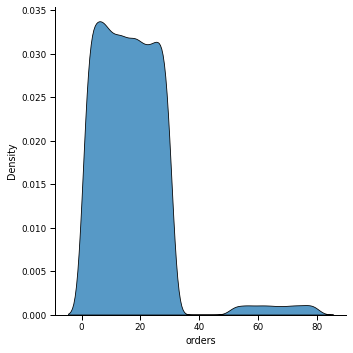

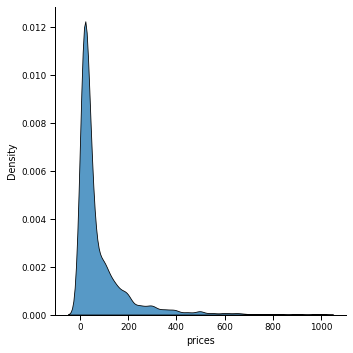

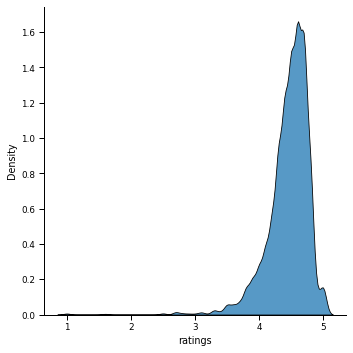

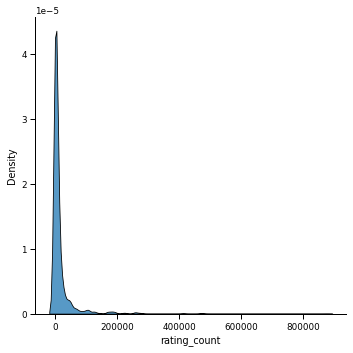

In [35]:
# Histogram Distrubution of varaibles

for i in df.select_dtypes(exclude=['object']).columns:
    sns.displot(data=df, x= df[i], kind = "kde", multiple = "stack")

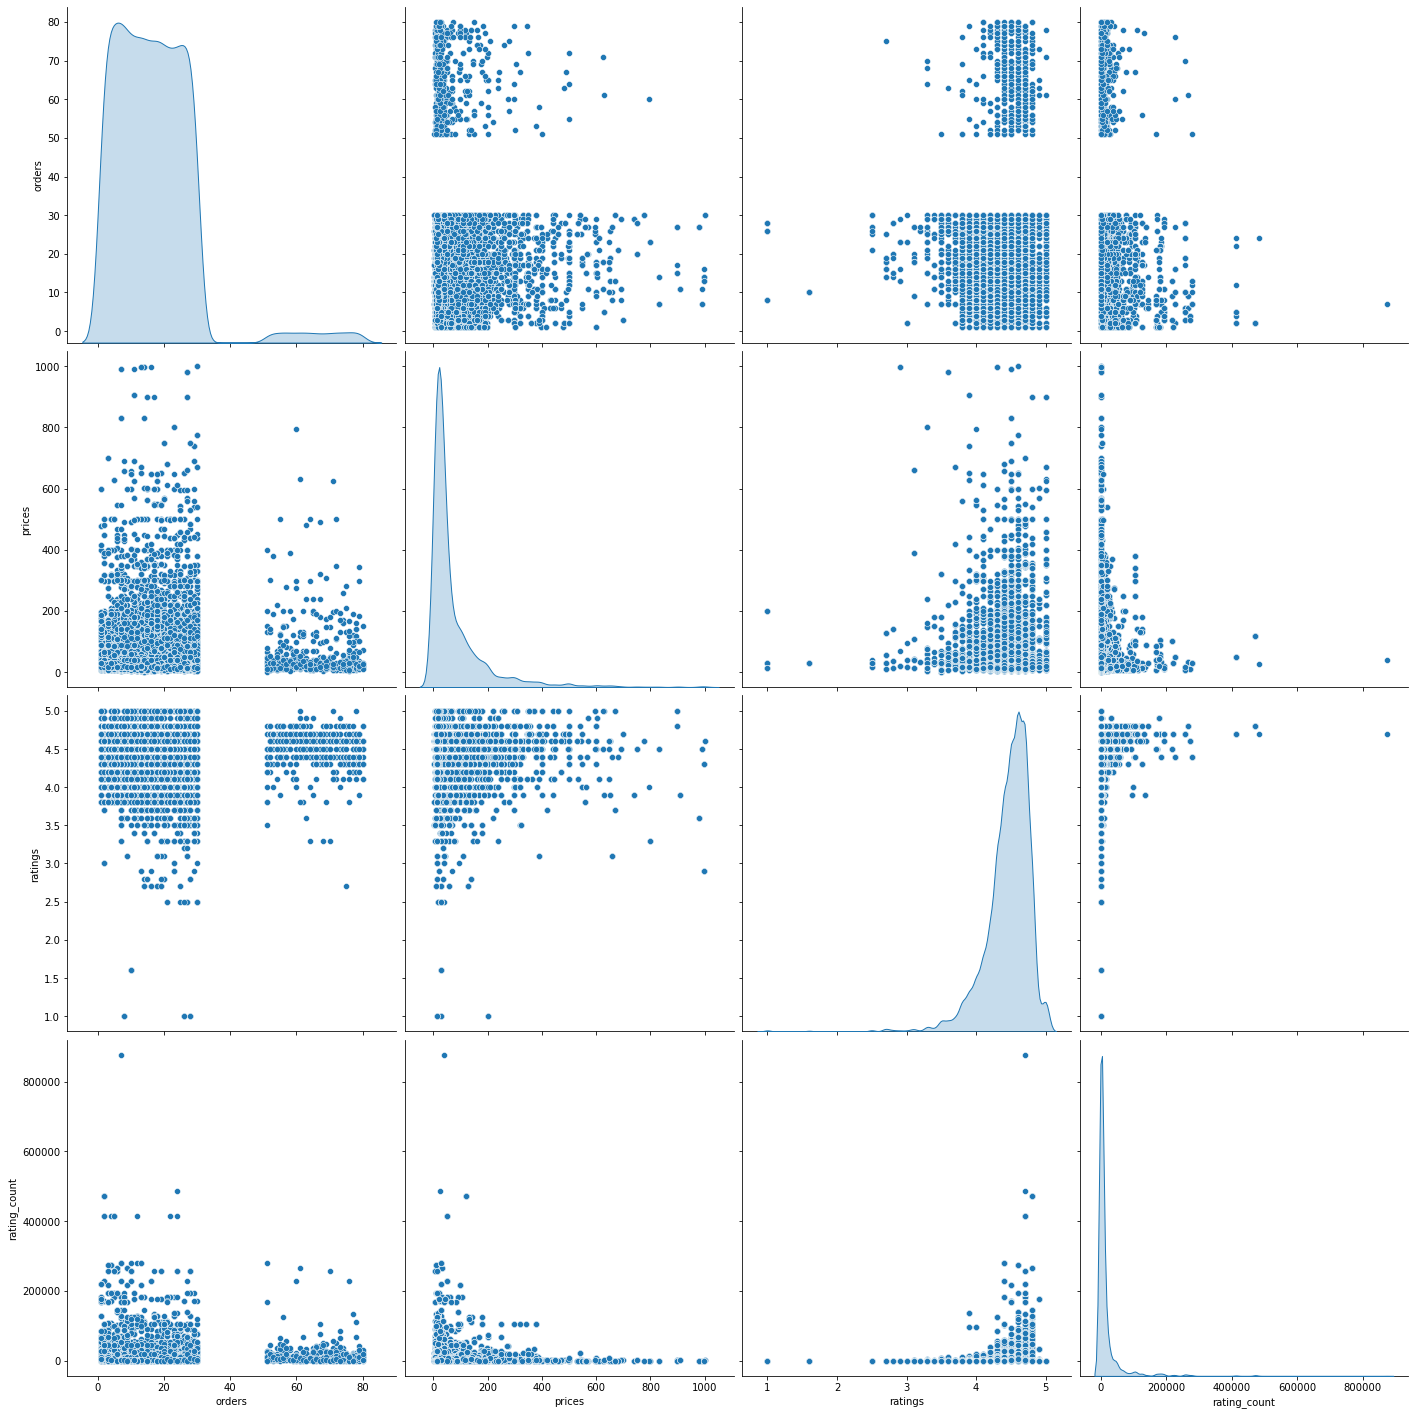

In [11]:
sns.pairplot(data=df,diag_kind="kde",height=5)

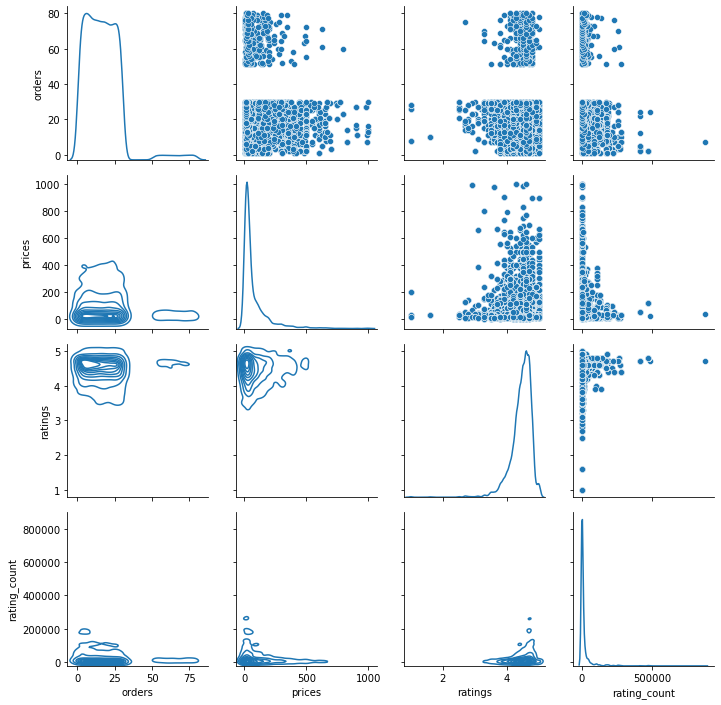

In [8]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)

# Questions of Interest

## Group 1 - Individual Logistics
### What are the top ten highest rated products? 
### What are the top ten products with the most ratings count?
### What are the top ten most expensive items sold on the Amazon best sellers website?

## Group 2 - Collective Logistics
### Which category type has the highest average price?
### Which category type has the highest average ratings? highest ratings count?

## Group 3 - Viewing Trends
### How does the amount of ratings affect the price? 
### Does Amazon intentionally put higher priced products in the top ten orderings?
### Describe the relationship between ratings and rating count for items in Electronics.

## Group 1 Questions

In [8]:
# Top Ten Rated Products

#top_ten_rated = df.nlargest(10, 'ratings', )
top_ten_rated = df.sort_values(by='ratings', ascending=False)
top_ten_rated.drop_duplicates(subset='name', keep='first').head(10)

# Top Ratings Does Not Provide Much Insight
# Will Need Pandas Lambda Function

M = df['rating_count'].mean()
Q = -M/np.log(1/2)

df_prime = df.copy()
df_prime = df_prime.assign(ratings_by_count  = lambda x: (5*x['ratings']+5*(1-np.exp(-x['rating_count']/Q))))

top_ten_rated_count = df_prime.sort_values(by='ratings_by_count', ascending=False)
temp_data = top_ten_rated_count.drop_duplicates(subset='ratings_by_count', keep='first').head(10)
temp_data

category  orders  \
13450  Best Sellers in Nintendo Switch Consoles & Acc...    11.0   
6181          Best Sellers in Earbud & In-Ear Headphones     2.0   
185           Best Sellers in Camera & Photo Accessories     6.0   
13                           Best Sellers in Electronics    14.0   
79     Best Sellers in Electronics Accessories & Supp...    20.0   
156           Best Sellers in Camera & Photo Accessories     7.0   
3902              Best Sellers in Cell Phone Accessories     3.0   
13489  Best Sellers in Nintendo Switch Consoles & Acc...    20.0   
6911                 Best Sellers in Home Audio Speakers    12.0   
13477  Best Sellers in Nintendo Switch Consoles & Acc...     8.0   

                                                    name  prices  ratings  \
13450  SanDisk 256GB microSDXC-Card, Licensed for Nin...   41.79      4.9   
6181                      Apple AirPods (2nd Generation)  118.98      4.8   
185    SanDisk 256GB Extreme microSDXC UHS-I Memory C...   32.98      4.8   
13     Roku Express | HD Streaming Media Player with ...   29.00      4.8   
79     SanDisk 128GB Ultra MicroSDXC UHS-I Memory Car...   16.99      4.8   
156    SanDisk 128GB Extreme PRO SDXC UHS-I Card - C1...   29.79      4.8   
3902                       Apple 20W USB-C Power Adapter   17.98      4.8   
13489  Nintendo Switch with Neon Blue and Neon Red Jo...  318.98      4.8   
6911   JBL Flip 4, Black - Waterproof, Portable & Dur...   93.95      4.8   
13477  amFilm Tempered Glass Screen Protector for Nin...    7.99      4.8   

       rating_count  ratings_by_count  
13450      177512.0         29.498574  
6181       472670.0         29.000000  
185        266496.0         28.999976  
13         145212.0         28.993702  
79         126653.0         28.985215  
156        121833.0         28.981547  
3902       107985.0         28.965119  
13489      105828.0         28.961482  
6911        99981.0         28.949600  
13477       98753.0         28.946673

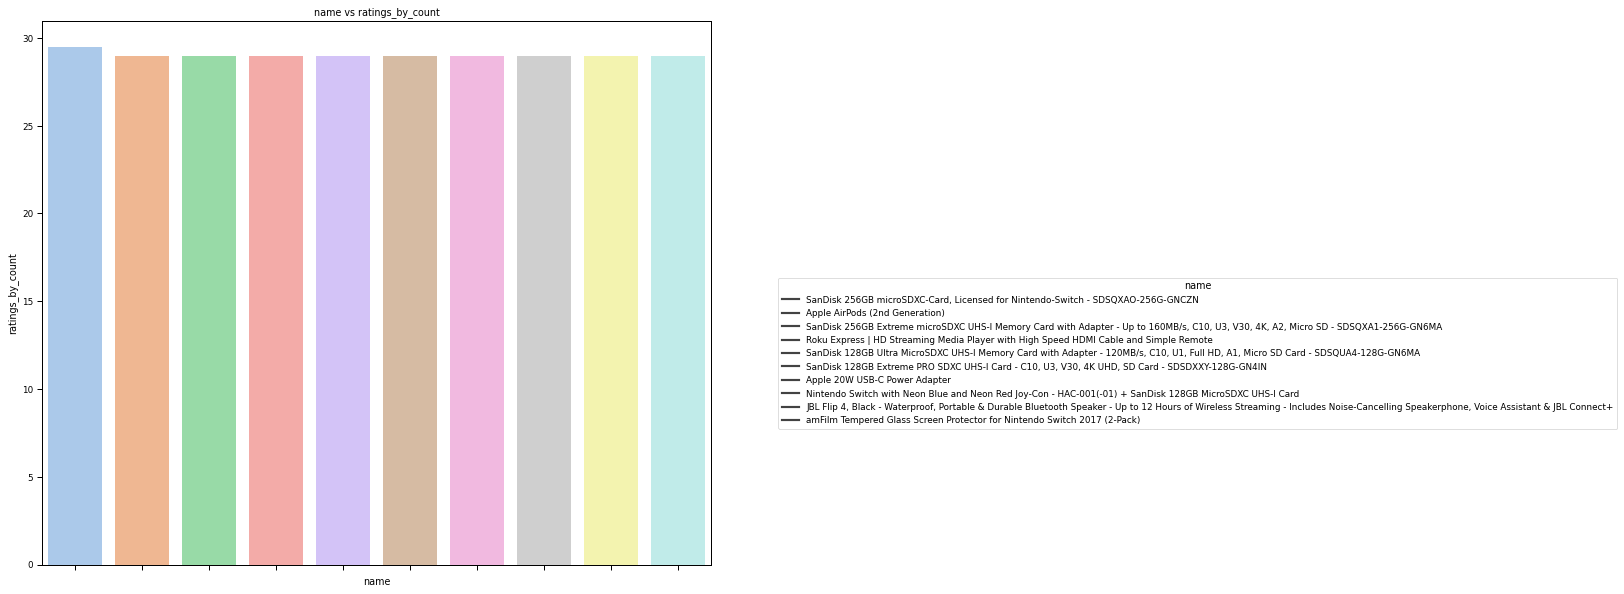

In [15]:
v_barplot(temp_data, 'name', 'ratings_by_count')

In [9]:
def v_barplot(df, col1, col2):
    
    plt.figure(figsize=[12,10])
    sns.set_context('paper')
    temp_plot = sns.barplot(data = df.sort_values(by=col2, ascending=False), x = col1, y = col2, palette='pastel')
    temp_plot.set(title= col1 + ' vs ' + col2)
    temp_plot.set(xticklabels = [])

    # legend
    plt.legend(title = col1, loc = (1.10,0.25), labels = [i for i in df[col1]])
    plt.show(temp_plot)
    #return temp_plot.set_xticklabels(temp_plot.get_xticklabels(), rotation = 90)

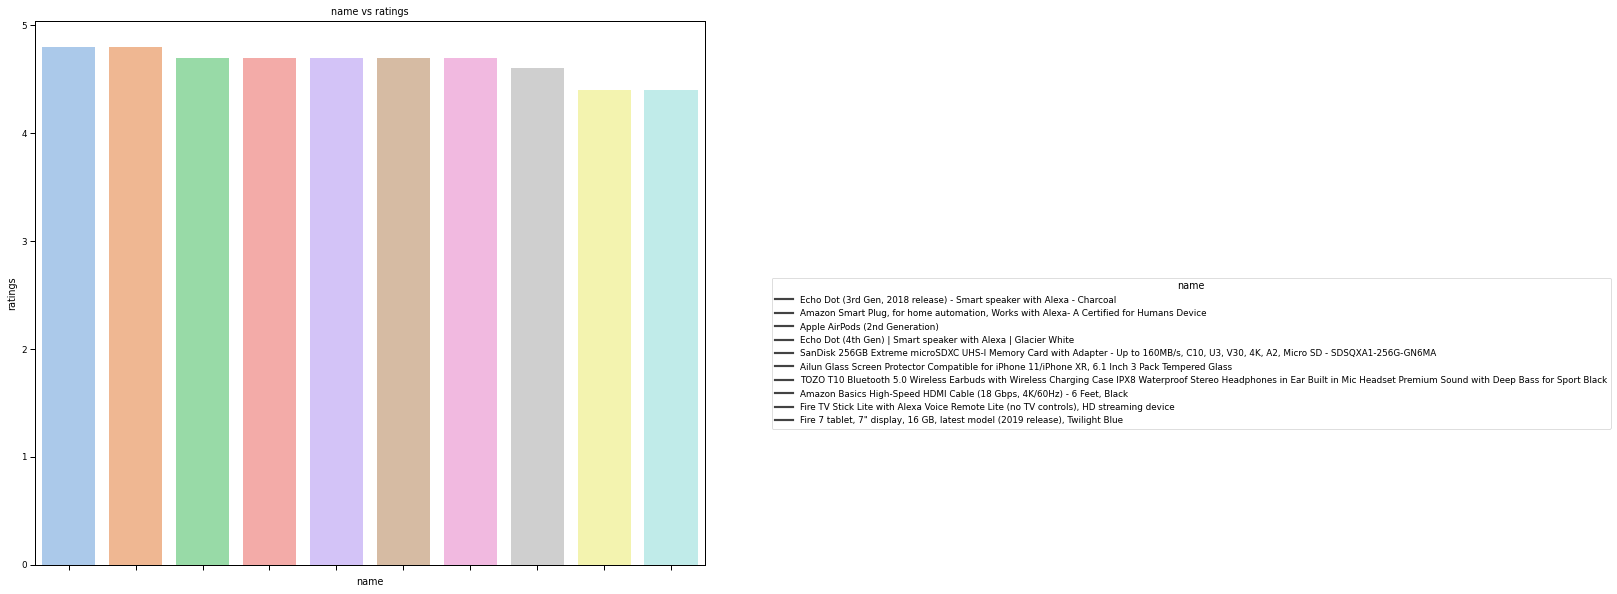

In [66]:
v_barplot(temp_data, 'name', 'ratings')

In [67]:
# Products With The Top Ten Ratings Count

top_ten_rated_count = df.sort_values(by='rating_count', ascending=False)
top_ten_rated_count = top_ten_rated_count.drop_duplicates(subset='rating_count', keep='first').head(10)
top_ten_rated_count

category  orders  \
6                            Best Sellers in Electronics     7.0   
23                           Best Sellers in Electronics    24.0   
61     Best Sellers in Electronics Accessories & Supp...     2.0   
6874                 Best Sellers in Home Audio Speakers     5.0   
10002       Best Sellers in MP3 & MP4 Player Accessories    13.0   
273               Best Sellers in Cell Phone Accessories     4.0   
128           Best Sellers in Camera & Photo Accessories     9.0   
305            Best Sellers in Audio & Video Accessories     6.0   
4476                 Best Sellers in Computers & Tablets     7.0   
12690            Best Sellers in Streaming Media Players     1.0   

                                                    name  prices  ratings  \
6      Echo Dot (3rd Gen, 2018 release) - Smart speak...   39.99      4.7   
23     Amazon Smart Plug, for home automation, Works ...   24.99      4.7   
61                        Apple AirPods (2nd Generation)  118.98      4.8   
6874   Echo Dot (4th Gen) | Smart speaker with Alexa ...   49.99      4.7   
10002  TOZO T10 Bluetooth 5.0 Wireless Earbuds with W...   29.98      4.4   
273    Ailun Glass Screen Protector Compatible for iP...    8.98      4.6   
128    SanDisk 128GB Extreme microSDXC UHS-I Memory C...   21.49      4.8   
305    Amazon Basics High-Speed HDMI Cable (18 Gbps, ...    6.99      4.7   
4476   Fire 7 tablet, 7" display, 16 GB, latest model...   49.99      4.4   
12690  Fire TV Stick Lite with Alexa Voice Remote Lit...   29.99      4.7   

       rating_count  
6          875687.0  
23         485163.0  
61         472670.0  
6874       413401.0  
10002      278990.0  
273        273142.0  
128        266496.0  
305        257413.0  
4476       227813.0  
12690      221078.0

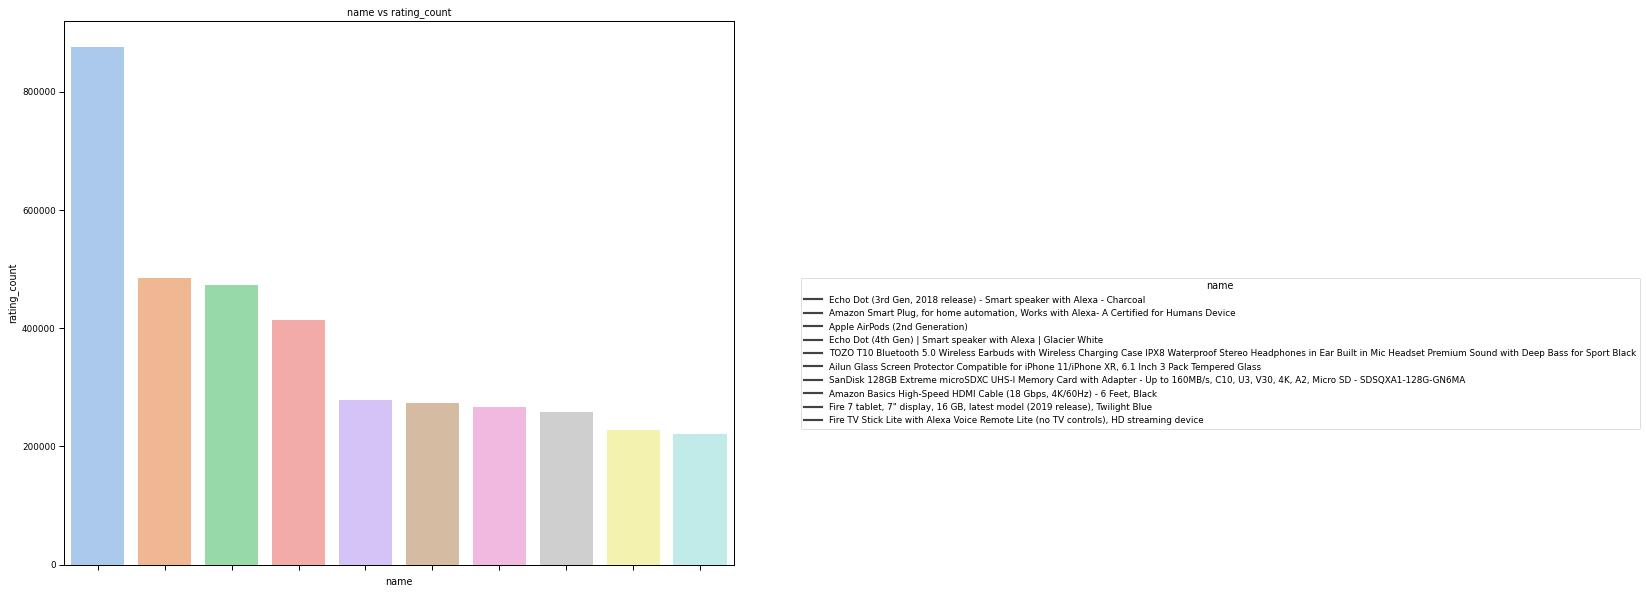

In [68]:
v_barplot(top_ten_rated_count, 'name', 'rating_count')

In [72]:
# Top Ten Most Expensive Amazon Best Sellers Products

top_ten_expensive = df.sort_values(by='prices', ascending=False)
top_ten_expensive = top_ten_expensive.drop_duplicates(subset='prices', keep='first').head(10)
top_ten_expensive

category  orders  \
11489       Best Sellers in Surveillance Video Equipment    30.0   
11803  Best Sellers in Audio/Video Receivers & Amplif...    14.0   
13092              Best Sellers in Video Display Glasses    13.0   
5136                    Best Sellers in Computer Servers     7.0   
7736    Best Sellers in Marine GPS Units & Chartplotters    27.0   
12100                     Best Sellers in DVD-VCR Combos    11.0   
7336                  Best Sellers in Boating Autopilots    17.0   
2306           Best Sellers in Camcorder & Camera Lenses    27.0   
5886    Best Sellers in Marine GPS Units & Chartplotters     7.0   
4102                         Best Sellers in Cell Phones    23.0   

                                                    name  prices  ratings  \
11489  REOLINK 4K Security Camera System, 8pcs H.265 ...  999.99      4.6   
11803  Marantz NR1711 8K Slim 7.2 Channel Ultra HD AV...  999.00      4.3   
13092  GOOVIS Pro-2021 P2 Head-Mounted Display 3D Blu...  998.00      2.9   
5136   Dell PowerEdge T40 Server, BTX Intel Xeon E-22...  990.00      4.5   
7736        Raymarine Axiom 9-9" MFD Chartplotter E70366  980.20      3.6   
12100        Magnavox MWD2206 DVD/VCR Combination Player  907.50      3.9   
7336            Simrad TP32 Boating Electrical Equipment  899.00      5.0   
2306   Sony FE 20mm F1.8 G Full-Frame Large-Aperture ...  898.00      4.8   
5886   Garmin dezl OTR1000 10" GPS Truck Navigator (0...  829.99      4.5   
4102   Samsung Galaxy S22 Smartphone, Factory Unlocke...  799.99      3.3   

       rating_count  
11489         773.0  
11803         139.0  
13092           2.0  
5136           75.0  
7736            4.0  
12100         422.0  
7336            6.0  
2306          434.0  
5886          247.0  
4102            3.0

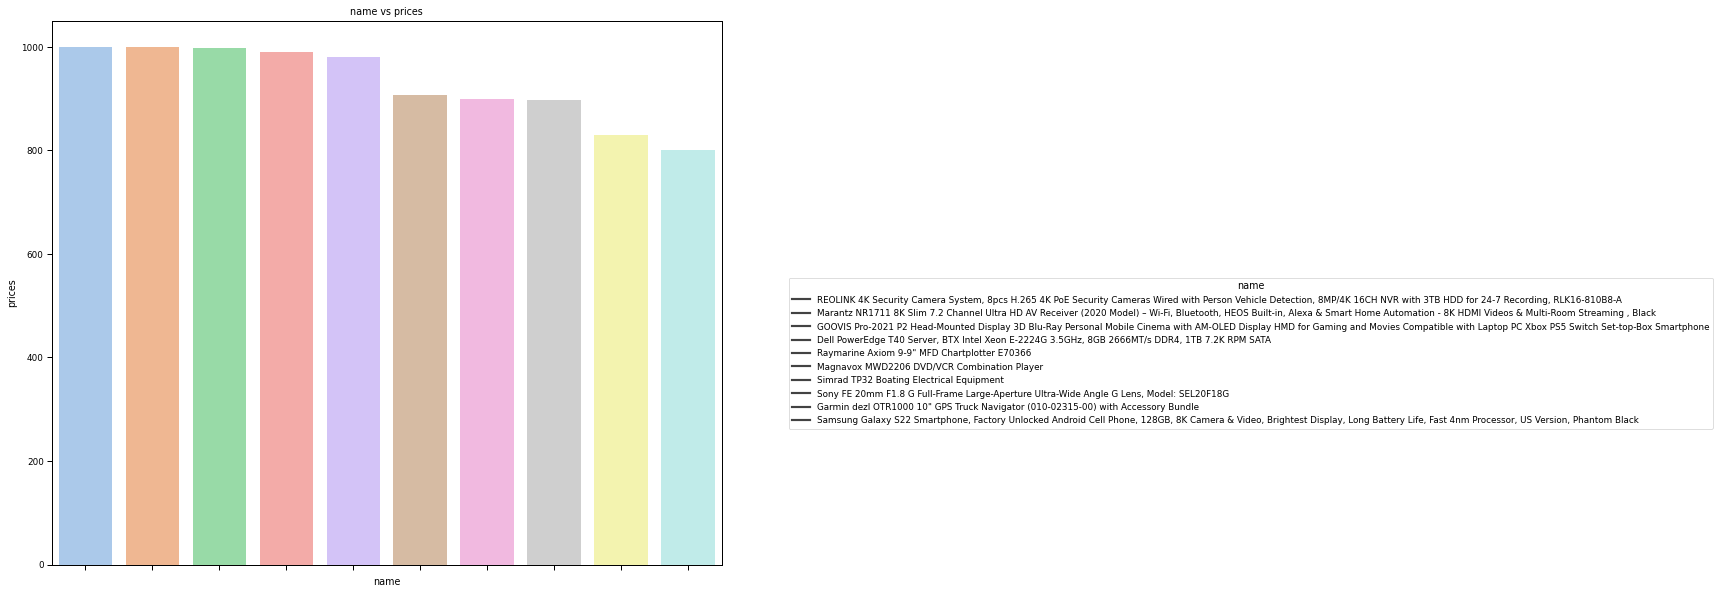

In [73]:
v_barplot(top_ten_expensive, 'name', 'prices')

## Group 2 Questions

<AxesSubplot:ylabel='category'>

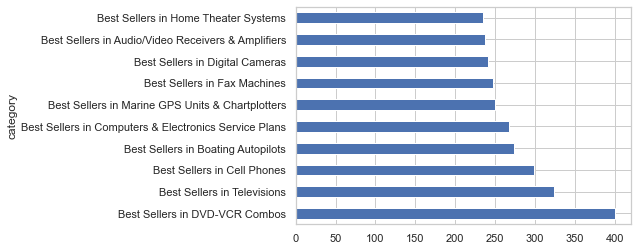

In [29]:
# Most Expensive Category

df.groupby('category')['prices'].mean().sort_values(ascending=False).head(10).T.plot(kind='barh')

<AxesSubplot:ylabel='category'>

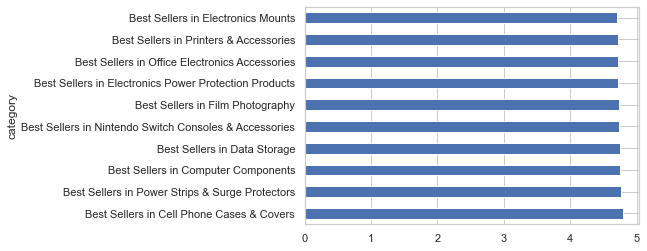

In [31]:
# Most Highly Rated Category

df.groupby('category')['ratings'].mean().sort_values(ascending=False).head(10).T.plot(kind='barh')

In [10]:
df_prime.head()

category  orders  \
0  Best Sellers in Electronics     1.0   
1  Best Sellers in Electronics     2.0   
2  Best Sellers in Electronics     3.0   
3  Best Sellers in Electronics     4.0   
4  Best Sellers in Electronics     5.0   

                                                name  prices  ratings  \
0  Fire TV Stick Lite with Alexa Voice Remote Lit...   29.99      4.7   
1  Fire TV Stick 4K streaming device with latest ...   39.99      4.8   
2  Fire TV Stick with Alexa Voice Remote (include...   39.99      4.7   
3  Echo Dot (4th Gen, 2020 release) | Smart speak...   49.99      4.7   
4                                       Apple AirTag   29.00      4.7   

   rating_count  ratings_by_count  
0      221078.0         28.499808  
1       61896.0         28.709627  
2      168919.0         28.497883  
3      413401.0         28.500000  
4       42541.0         27.792934

<AxesSubplot:ylabel='category'>

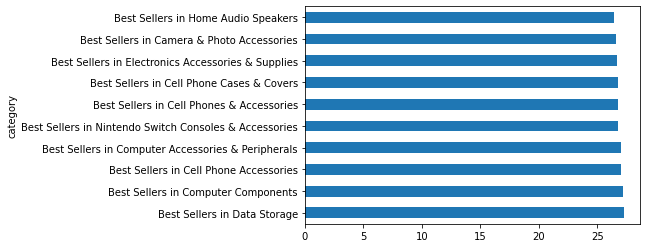

In [12]:
# Notice our top ten all have the same ratings. Need to account for product ratings with minimal rating counts. Using Weighted Ratings By Count to compare average values

df_prime.groupby('category')['ratings_by_count'].mean().sort_values(ascending=False).head(10).T.plot(kind='barh')

<AxesSubplot:ylabel='category'>

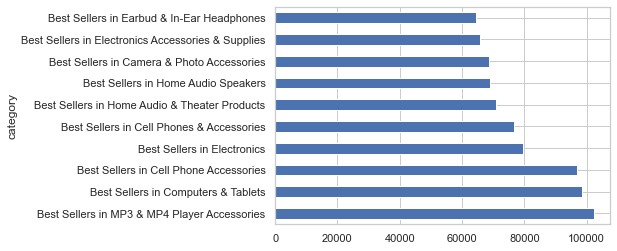

In [24]:
# Categories With The Most Rating Counts

df.groupby('category')['rating_count'].mean().sort_values(ascending=False).head(10).T.plot(kind='barh')

## Group 3 Questions

#### Unfortunately, from the correlation graph above, there does not exists strong any variable relations in our data. But lets visualize the trends. 

<AxesSubplot:xlabel='ratings', ylabel='prices'>

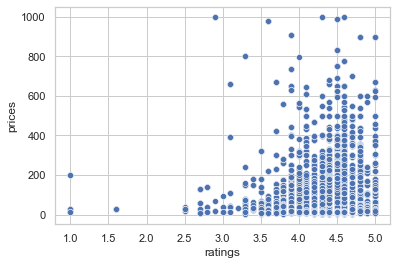

In [21]:
# Ratings Vs Price

sns.set_theme(style="whitegrid")

sns.scatterplot(data=df, x = 'ratings', y = 'prices')

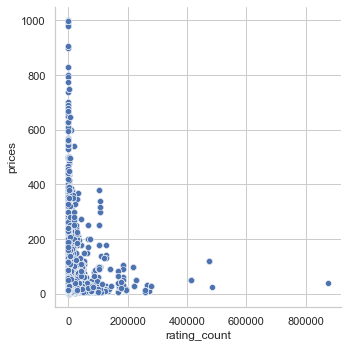

In [19]:
# Ratings_count vs Price

sns.set_theme(style="whitegrid")

sns.relplot(data= df, x="rating_count", y = "prices")

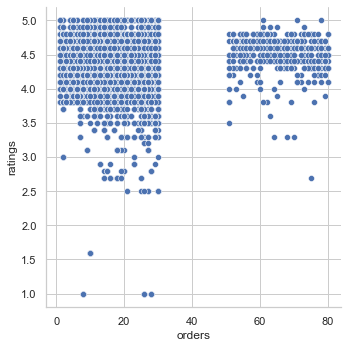

In [44]:
# Top Ten Orders and Ratings

top_ten_orders = df[df['orders'] < 20]

sns.relplot(data=df, x = 'orders', y = 'ratings')


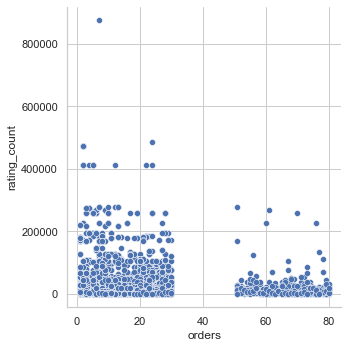

In [46]:
# Top Ten Orders vs Rating Count

sns.relplot(data = df, x = 'orders', y= 'rating_count')

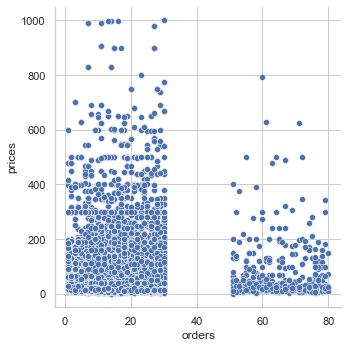

In [49]:
sns.relplot(data = df, x = 'orders', y = 'prices')

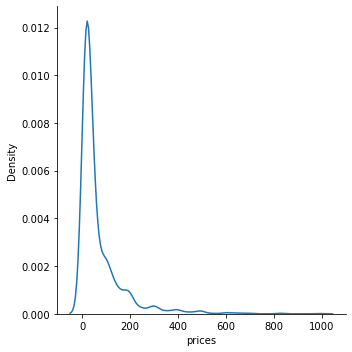

In [9]:
# Top Ten orderings vs Price

top_ten_orders = df[df['orders'] <= 10]
sns.displot(top_ten_orders, x = 'prices', kind = 'kde')

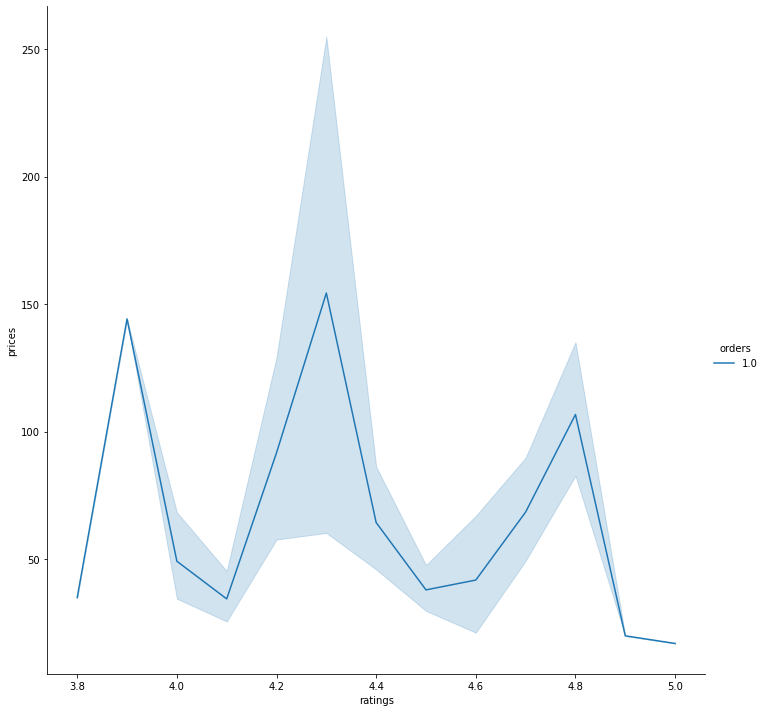

In [20]:
sns.relplot(data = df.query("orders == 1"), x = 'ratings', y = 'prices', kind = 'line', hue = 'orders', height=10)


In [9]:
# Relationship Between Ratings and Rating Count for Electronics

Electronics = df[df['category'].str.contains("Electronics") == True]
Electronics

category  orders  \
0                            Best Sellers in Electronics     1.0   
1                            Best Sellers in Electronics     2.0   
2                            Best Sellers in Electronics     3.0   
3                            Best Sellers in Electronics     4.0   
4                            Best Sellers in Electronics     5.0   
...                                                  ...     ...   
11546  Best Sellers in Computers & Electronics Servic...    27.0   
11550  Best Sellers in Computers & Electronics Servic...    51.0   
11559  Best Sellers in Computers & Electronics Servic...    60.0   
11560  Best Sellers in Computers & Electronics Servic...    61.0   
11570  Best Sellers in Computers & Electronics Servic...    71.0   

                                                    name  prices  ratings  \
0      Fire TV Stick Lite with Alexa Voice Remote Lit...   29.99      4.7   
1      Fire TV Stick 4K streaming device with latest ...   39.99      4.8   
2      Fire TV Stick with Alexa Voice Remote (include...   39.99      4.7   
3      Echo Dot (4th Gen, 2020 release) | Smart speak...   49.99      4.7   
4                                           Apple AirTag   29.00      4.7   
...                                                  ...     ...      ...   
11546  Fortinet FortiWiFi-60E 1 Year Unified (UTM) Pr...  457.92      5.0   
11550  Used Vehicle Automotive Bill of Sale Purchase ...   46.73      4.8   
11559  FORTINET FortiGate-80E 1YR Enterprise Protecti...  794.21      4.0   
11560  FORTINET FortiGate-60F 1YR Enterprise Protecti...  629.97      5.0   
11570  VMware vSphere Essentials Bundle Including 1 Y...  625.00      5.0   

       rating_count  
0          221078.0  
1           61896.0  
2          168919.0  
3          413401.0  
4           42541.0  
...             ...  
11546           1.0  
11550          37.0  
11559           1.0  
11560           1.0  
11570           1.0  

[590 rows x 6 columns]

In [10]:
# Grouping Orders Variable For Visualization

Electronics['order_grouping'] = pd.cut(Electronics['orders'], bins = [0, 10, 81], labels = ['top_ten', 'not_top_ten'])
Electronics

C:\Users\Josh\AppData\Local\Temp/ipykernel_7944/292498309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Electronics['order_grouping'] = pd.cut(Electronics['orders'], bins = [0, 10, 81], labels = ['top_ten', 'not_top_ten'])


category  orders  \
0                            Best Sellers in Electronics     1.0   
1                            Best Sellers in Electronics     2.0   
2                            Best Sellers in Electronics     3.0   
3                            Best Sellers in Electronics     4.0   
4                            Best Sellers in Electronics     5.0   
...                                                  ...     ...   
11546  Best Sellers in Computers & Electronics Servic...    27.0   
11550  Best Sellers in Computers & Electronics Servic...    51.0   
11559  Best Sellers in Computers & Electronics Servic...    60.0   
11560  Best Sellers in Computers & Electronics Servic...    61.0   
11570  Best Sellers in Computers & Electronics Servic...    71.0   

                                                    name  prices  ratings  \
0      Fire TV Stick Lite with Alexa Voice Remote Lit...   29.99      4.7   
1      Fire TV Stick 4K streaming device with latest ...   39.99      4.8   
2      Fire TV Stick with Alexa Voice Remote (include...   39.99      4.7   
3      Echo Dot (4th Gen, 2020 release) | Smart speak...   49.99      4.7   
4                                           Apple AirTag   29.00      4.7   
...                                                  ...     ...      ...   
11546  Fortinet FortiWiFi-60E 1 Year Unified (UTM) Pr...  457.92      5.0   
11550  Used Vehicle Automotive Bill of Sale Purchase ...   46.73      4.8   
11559  FORTINET FortiGate-80E 1YR Enterprise Protecti...  794.21      4.0   
11560  FORTINET FortiGate-60F 1YR Enterprise Protecti...  629.97      5.0   
11570  VMware vSphere Essentials Bundle Including 1 Y...  625.00      5.0   

       rating_count order_grouping  
0          221078.0        top_ten  
1           61896.0        top_ten  
2          168919.0        top_ten  
3          413401.0        top_ten  
4           42541.0        top_ten  
...             ...            ...  
11546           1.0    not_top_ten  
11550          37.0    not_top_ten  
11559           1.0    not_top_ten  
11560           1.0    not_top_ten  
11570           1.0    not_top_ten  

[590 rows x 7 columns]

In [10]:
Electronics.dtypes

category            object
orders             float64
name                object
prices             float64
ratings            float64
rating_count       float64
order_grouping    category
dtype: object

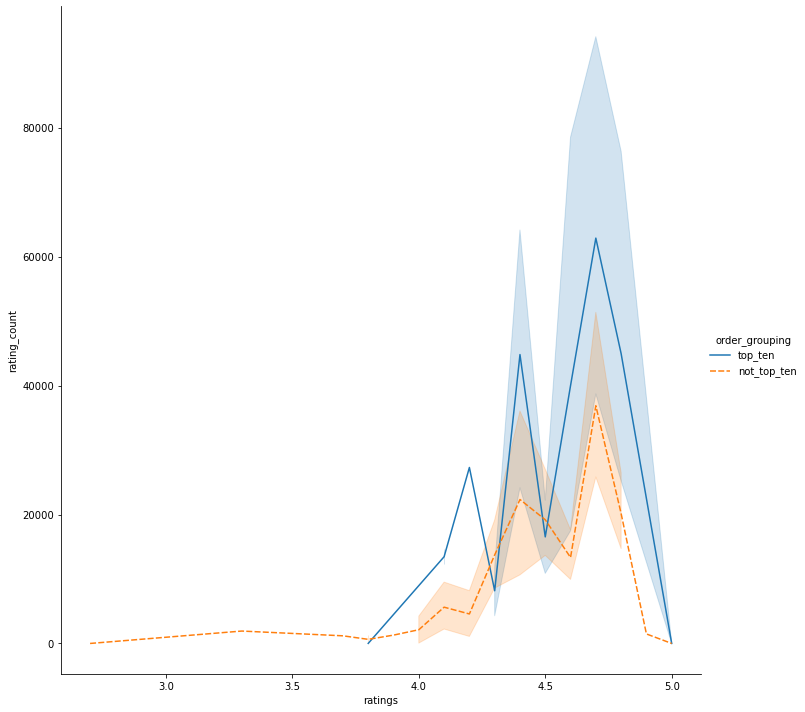

In [11]:
sns.relplot(data = Electronics, x = 'ratings', y = 'rating_count', kind = 'line', height = 10, hue = "order_grouping", style="order_grouping")

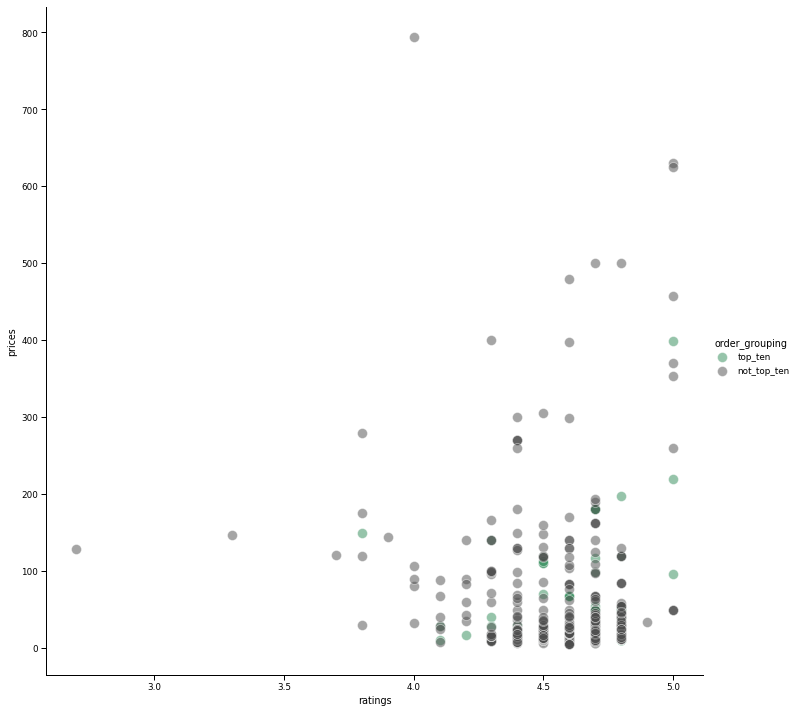

In [40]:
palette = dict(top_ten = "seagreen", not_top_ten = ".3")
g = sns.FacetGrid(Electronics, hue = 'order_grouping', palette= palette, height=10)
g.map(sns.scatterplot, 'ratings', 'prices', s = 100, alpha = .5)
g.add_legend()

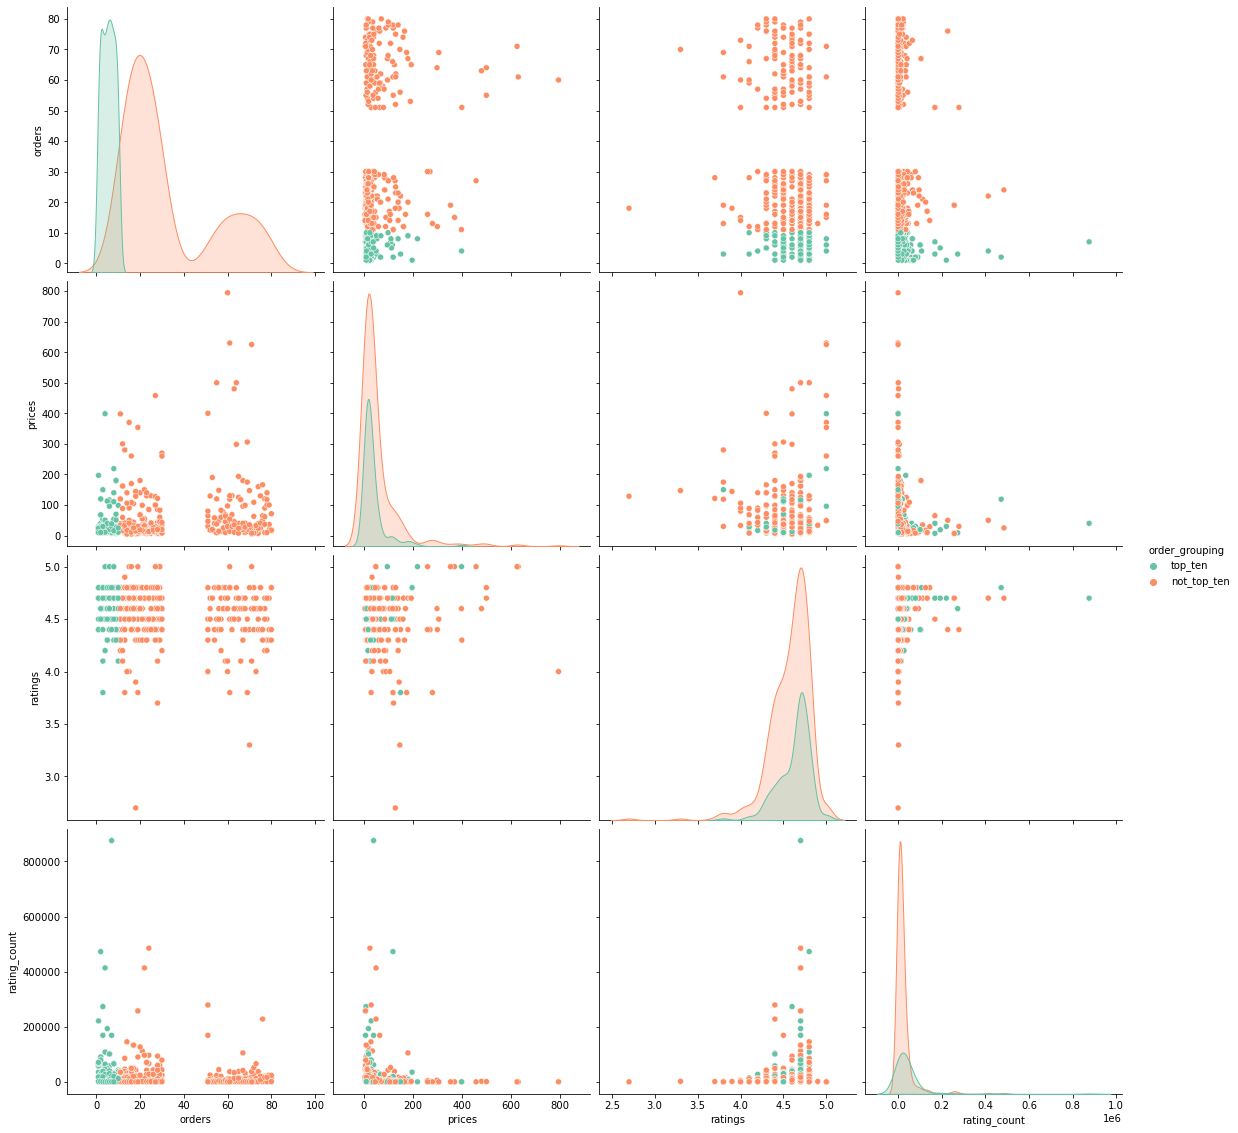

In [15]:
sns.pairplot(data=Electronics, hue = 'order_grouping', palette= "Set2", diag_kind= "kde", height = 4)

In [13]:
# t-test 

import scipy.stats as scs

def order_impact(col1):
    array1 = np.array(Electronics[Electronics['order_grouping']== "top_ten"][col1])
    array2= np.array(Electronics[Electronics['order_grouping']== "not_top_ten"][col1])
    t,p_value = scs.mannwhitneyu(array1, array2, method="asymptotic")
    if p_value < 0.05:
        print(col1," has a significant impact on the ordering rank of items on Amazons Best Sellers. The p-value is: ",p_value)
    else:
        print(col1," does not have a significant impact on the ordering rank of items on Amazons Best Sellers. The p-value is: ",p_value)

In [12]:
for i in Electronics.select_dtypes([np.number]).columns:
    order_impact(i)

orders  has a significant impact on the ordering rank of items on Amazons Best Sellers. The p-value is:  5.603683794439682e-78
prices  does not have a significant impact on the ordering rank of items on Amazons Best Sellers. The p-value is:  0.05278452935040999
ratings  has a significant impact on the ordering rank of items on Amazons Best Sellers. The p-value is:  0.017610442092790467
rating_count  has a significant impact on the ordering rank of items on Amazons Best Sellers. The p-value is:  3.111401951319074e-10
